# **YOLOV8 Clothes Detetcion**


This notebook explains training custom YOLOv8 model for object detection. I am using "
fashion-dataset-with-annotation Dataset" from kaggle which is already available in yolo format. 
https://www.kaggle.com/datasets/lahbibfedi/fashion-dataset-with-annotation


This is a initial version of custom trianing with YOLOv8.
Currently YOLOv8 is the newest state-of-the-art YOLO model that can be used for object detection, image classification, and instance segmentation tasks.


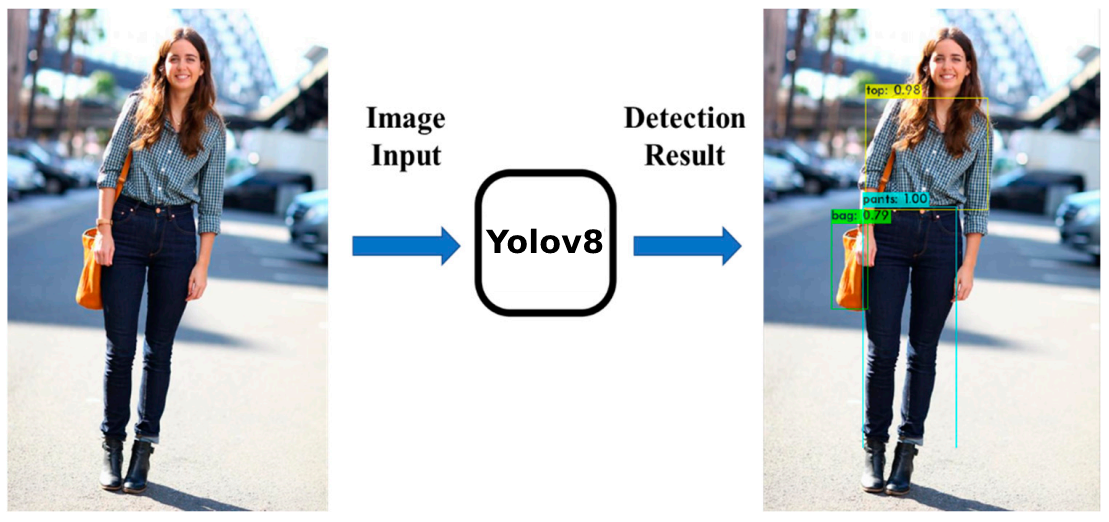

In [ ]:
# You should prepare the data for the training
%mkdir images
%mkdir labels
%cp -r '/kaggle/input/fashion-dataset-with-annotation/new_train (1)/new_t/labels/' '/kaggle/working/labels/'
%mv '/kaggle/working/labels/labels' '/kaggle/working/labels/train'
%cp -r '/kaggle/input/fashion-dataset-with-annotation/new_validation (1)/new_v/labels'  '/kaggle/working/labels'
%mv '/kaggle/working/labels/labels' '/kaggle/working/labels/val'
%cp -r '/kaggle/input/fashion-dataset-with-annotation/new_train (1)/new_t/images/' '/kaggle/working/images/'
%mv '/kaggle/working/images/images' '/kaggle/working/images/train'
%cp -r '/kaggle/input/fashion-dataset-with-annotation/new_validation (1)/new_v/images'  '/kaggle/working/images'
%mv '/kaggle/working/images/images' '/kaggle/working/images/val'

### **2. YOLOV8 Installation:**
We used to clone the repo or use torchhub to work with Yolov5. The recent YoloV8 has been released as pip package, so we don't need to clone any repo. This package alone installs ever dependency for yolov8.

The Pip install of the ultralytics package including all requirements.txt in a Python>=3.7.0 environment, including PyTorch>=1.7.


In [ ]:
# installing package to work with yolov8
!pip install ultralytics

### **YOLOV8 format:**

The format for Yolov8 is same as Yolov5. The YOLO format, with one .txt file per image (if no objects in image, no .txt file is required). The *.txt file specifications are:

One row per object Each row is class x_center y_center width height format.

Box coordinates must be in normalized xywh format (from 0 - 1). If your boxes are in pixels, divide x_center and width by image width, and y_center and height by image height. Class numbers are zero-indexed (start from 0).

In [ ]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/kaggle/working/images/train/000024.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/kaggle/working/images/val/005753.jpg')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

In [ ]:
# dispying with different width
from IPython.display import Image 
Image(filename='/kaggle/working/images/train/000024.jpg', width=700) 

### **4. Create detetcion.yaml (dataset config file)**

"/kaggle/input/fashion-dataset-with-annotation dataste" is having the images are split as follows:
Train: 10000 = 80%
Valid: 2000 = 10%
Total = 10000 images

/kaggle/input/detection-fashion/detection.yaml, created below, is the dataset config file that defines:

the dataset root directory path and relative paths to train / val / test image directories (or *.txt files with image paths)

nc: the number of classes

names: a list of class names

In [ ]:
%%writefile -a /kaggle/working/detection.yaml 

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
train: "/kaggle/working/images/train/"
val: "/kaggle/working/images/val/"

# Classes
nc: 13
# Class names
# Replace all class names list with your class names
names: ["short_sleeved_shirt", "long_sleeved_shirt", "short_sleeved_outwear", "long_sleeved_outwear", "vest", "sling", "shorts", "trousers", "skirt", "short_sleeved_dress", "long_sleeved_dress", "vest_dress", "sling_dress"]


### **5. Training Our Custom Clothes Detetcion Model:**

I am using a YOLOv8m pretrained model for custom training with my dataset.

Parameters:
*   specify the path to the data configuration file
*   specify a path to weights to start transfer learning from. yolov8m.pt (starting from Pretrained weights)
*   input image size
*   Size of a batch (model weights are updated with each batch).
*   No of epochs.

It will cache images for faster training, cache images in "ram" (default) or "disk

In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/kaggle/working/detection.yaml", epochs=25, imgsz=640)  # train the model

while training , I have observed some error. I think it is related to some plotting, so I have raised a issue yolov8 repo. Below is the link to track.
https://github.com/ultralytics/ultralytics/issues/337

### **Val:**

Validate trained YOLOv8n model accuracy on the validatio dataset. No argument need to passed as the model retains it's training data and arguments as model attributes.

In [ ]:
results = model.val()  # evaluate model performance on the validation set

### **Metrics:**
The trainig mAP per class and over all is good and testing results on video are also good. If we train for epochs, adding more data and playing with hyperparameters can improve performance of the model.

In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='/kaggle/working/runs/detect/train2/F1_curve.png') 
y = Image(filename='/kaggle/working/runs/detect/train2/PR_curve.png') 
z = Image(filename='/kaggle/working/runs/detect/train2/confusion_matrix.png') 
display(x, y,z)

### **Inference:**


In [ ]:
# checking the latest trained files
!ls 'runs/detect/train2/weights'

In [ ]:
# loading the trianed model
model = YOLO("runs/detect/train2/weights/best.pt")  # load a custom model

### **Conclusion:**
Based on the inference results, the trained model is doing a great job. We can still imrpove it by using large yolov8 models, additional data and hyperparameter changes. 

### **References:**

1.https://github.com/ultralytics/ultralytics